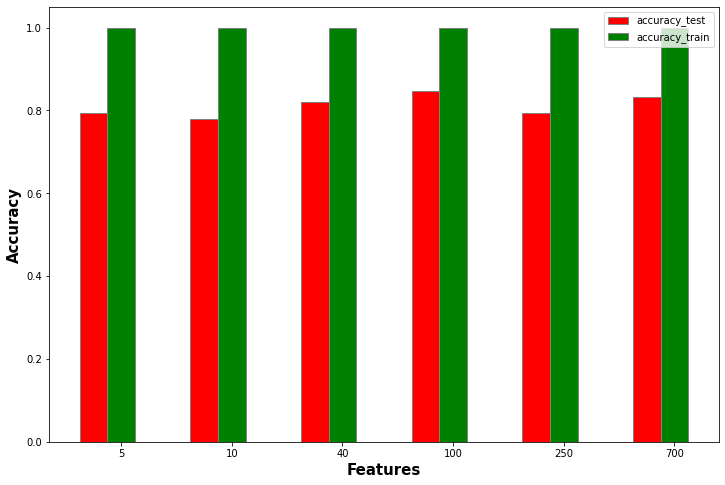

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

data = loadarff('/content/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

features = [5,10,40,100,250,700]
accuracy_train = []
accuracy_test = []
i=0
while i <  len(features):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,random_state=1,stratify=y)
  feature_selection = SelectKBest(mutual_info_classif,k=features[i])
  feature_selection.fit_transform(X_train,y_train)

  best_features=feature_selection.get_support(indices=True)

  X_train=X_train.iloc[:,best_features]
  X_test=X_test.iloc[:,best_features]

  clf = DecisionTreeClassifier()
  clf.fit(X_train,y_train)

  predictions_test = clf.predict(X_test)
  predictions_train = clf.predict(X_train)

  accuracy_test.append(metrics.accuracy_score(y_test, predictions_test))
  accuracy_train.append(metrics.accuracy_score(y_train, predictions_train))

  i=i+1

#bar plot
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1=np.arange(len(accuracy_test))
br2=[x + barWidth for x in br1]

plt.bar(br1, accuracy_test, color ='r', width = barWidth,
        edgecolor ='grey', label ='accuracy_test')
plt.bar(br2, accuracy_train, color ='g', width = barWidth,
        edgecolor ='grey', label ='accuracy_train')

plt.xlabel('Features', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(accuracy_test))],
        ['5','10','40','100','250','700'])

plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')